In [1]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.preprocessing import preprocesar_datos, guardar_datos_preprocesados

# 1. Carga de datos
print('Cargando datos...')
df = pd.read_csv('remove_correlated_data.csv') # raw data

Cargando datos...


In [ ]:
# 2. Información básica del dataset
print("=== Información básica del dataset ===")
df.info()

=== Información básica del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Item Key         95412 non-null  int64  
 1   Size                   67572 non-null  object 
 2   Calendar Month Number  95412 non-null  int64  
 3   Month                  95412 non-null  object 
 4   State Province         95412 non-null  object 
 5   Unique_Customers       95412 non-null  int64  
 6   Total_Profit           95412 non-null  float64
 7   Avg_Monthly_Sales      95412 non-null  int64  
 8   Season                 95412 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 6.6+ MB


In [3]:
# 3. Visualización de las primeras filas
print("=== Primeras 5 filas ===")
df.head()

=== Primeras 5 filas ===


,Stock Item Key,Size,Calendar Month Number,Month,State Province,Unique_Customers,Total_Profit,Avg_Monthly_Sales,Season
0,5,NaN,3,March,Idaho,1,7590.0,13,Spring
1,5,NaN,3,March,Wyoming,1,1518.0,13,Spring
2,5,NaN,3,March,Pennsylvania,3,11385.0,13,Spring
3,5,NaN,3,March,Maine,1,2277.0,13,Spring
4,5,NaN,3,March,Massachusetts[E],2,13662.0,13,Spring


In [4]:
# 4. Análisis de valores nulos
print("=== Análisis de valores nulos ===")
nulos = df.isnull().sum()
nulos[nulos > 0]

=== Análisis de valores nulos ===


Size    27840
dtype: int64

In [5]:
# 5. Estadísticas descriptivas
print("=== Estadísticas descriptivas ===")
df.describe()

=== Estadísticas descriptivas ===


,Stock Item Key,Calendar Month Number,Unique_Customers,Total_Profit,Avg_Monthly_Sales
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000
mean,110.981889,6.317602,1.987716,898.515710,93.337704
std,63.880897,3.449264,1.246961,2111.330662,108.701118
min,1.000000,1.000000,1.000000,-864.000000,8.000000
25%,56.000000,3.000000,1.000000,102.000000,12.000000
50%,110.000000,6.000000,2.000000,263.500000,16.000000
75%,167.000000,9.000000,3.000000,850.000000,150.000000
max,227.000000,12.000000,11.000000,57960.000000,606.000000


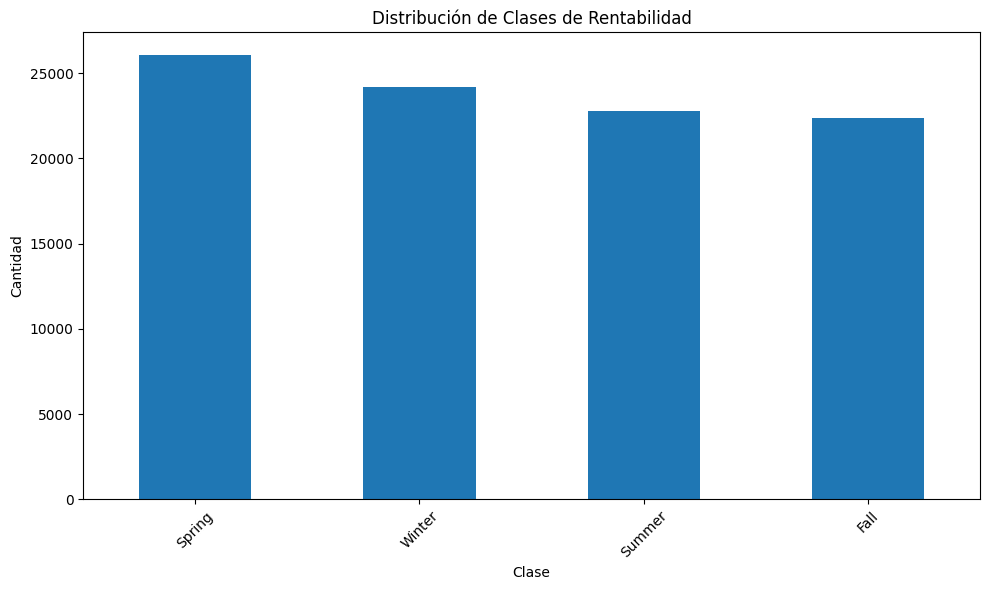

In [6]:
# 6. Visualización de la distribución de clases
plt.figure(figsize=(10, 6))
df['Season'].value_counts().plot(kind='bar')
plt.title('Distribución de Clases de Rentabilidad')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

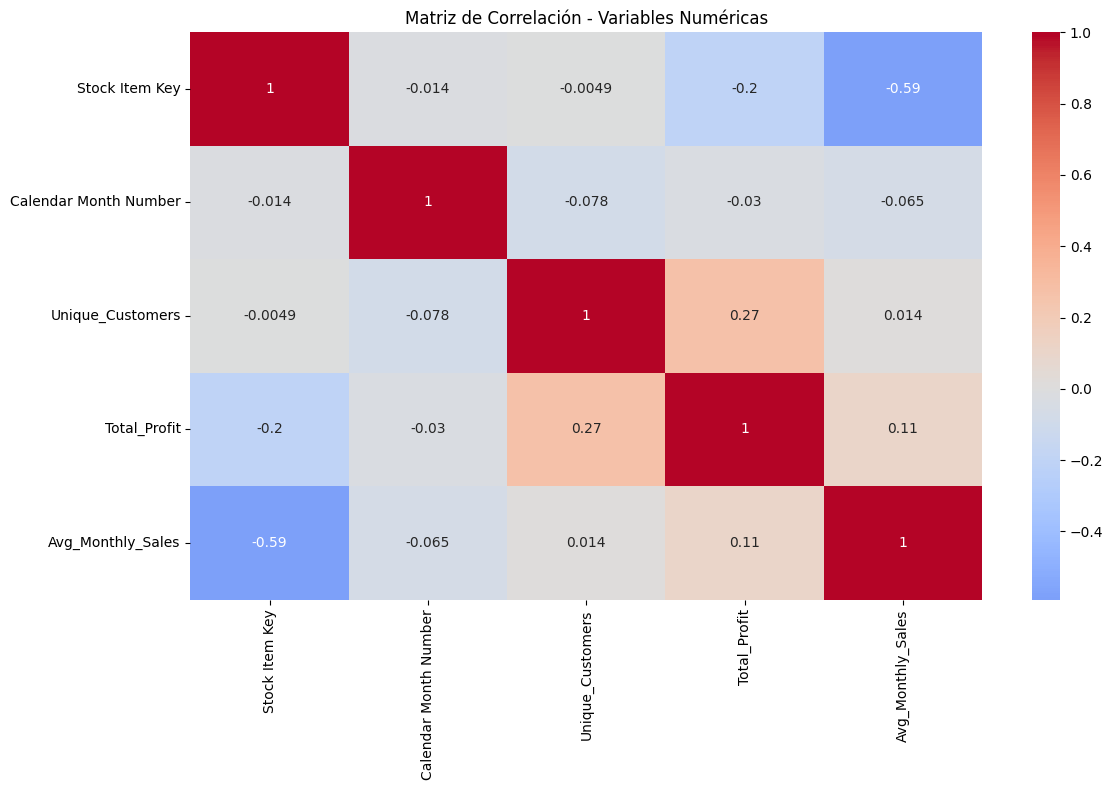

In [7]:
# 7. Matriz de correlación
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

In [8]:
# 8. Preprocesamiento de datos
print("=== Realizando preprocesamiento ===")
resultados = preprocesar_datos(df)

=== Realizando preprocesamiento ===

Verificando valores nulos antes de SMOTE:


In [9]:
# 9. Verificación del preprocesamiento - Distribución de clases
print("=== Distribución de clases en el conjunto de entrenamiento ===")
clases_unicas, conteos = np.unique(resultados['y_train'], return_counts=True)
for clase, conteo in zip(clases_unicas, conteos):
    print(f"Clase {clase}: {conteo} muestras")

=== Distribución de clases en el conjunto de entrenamiento ===
Clase 0: 20834 muestras
Clase 1: 20355 muestras
Clase 2: 20019 muestras
Clase 3: 20496 muestras


In [10]:
# 10. Verificación del preprocesamiento - Formas de los conjuntos
print("=== Formas de los conjuntos de datos ===")
print(f"X_train: {resultados['X_train'].shape}")
print(f"X_test: {resultados['X_test'].shape}")
print(f"y_train: {resultados['y_train'].shape}")
print(f"y_test: {resultados['y_test'].shape}")

=== Formas de los conjuntos de datos ===
X_train: (81704, 8)
X_test: (19083, 8)
y_train: (81704,)
y_test: (19083,)


In [11]:
# 11. Verificación del preprocesamiento - Rango de valores
print("=== Rango de valores después del escalamiento (X_train) ===")
for columna in resultados['X_train'].columns:
    min_val = resultados['X_train'][columna].min()
    max_val = resultados['X_train'][columna].max()
    print(f"{columna}: [{min_val:.2f}, {max_val:.2f}]")

=== Rango de valores después del escalamiento (X_train) ===
Stock Item Key: [1.00, 227.00]
Size: [0.00, 43.00]
Calendar Month Number: [-0.83, 1.00]
Month: [0.00, 11.00]
State Province: [0.00, 48.00]
Unique_Customers: [-0.50, 4.50]
Total_Profit: [-1.51, 2.28]
Avg_Monthly_Sales: [-0.06, 4.28]


In [12]:
# 12. Guardar datos preprocesados
print("=== Guardando datos preprocesados ===")
guardar_datos_preprocesados(resultados)
print("¡Proceso completado con éxito!")

=== Guardando datos preprocesados ===
¡Proceso completado con éxito!
